# Reporte analítica de datos - Proyecto de Grado II

## Preparación de los datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from pandas import DataFrame
from pandas import concat
from pandas.plotting import lag_plot
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
import datetime as datetime

In [2]:
data = pd.read_csv('../dengue_data/Data.csv')
df = pd.DataFrame(data)
df["Date"] = pd.to_datetime(df['Date'])
df['Age'] = df['Age'].astype(float)
df.set_index('Id', inplace=True)
df.head(10)

,City,Date,Age,Gender,Neighborhood,Commune
Id,,,,,,
1,Buga,2010-01-14,23.0,F,LA MERCED,4
2,Buga,2010-01-11,23.0,F,EL CARMELO,6
3,Buga,2010-01-10,20.0,M,EL CARMELO,6
4,Buga,2010-01-12,6.0,F,SUCRE,3
5,Buga,2010-01-07,13.0,M,POPULAR,5
6,Buga,2010-03-08,20.0,M,DIVINO NINO,3
7,Buga,2010-03-13,18.0,F,DIVINO NINO,3
8,Buga,2010-03-07,36.0,M,ALTO BONITO,1
9,Buga,2010-03-15,40.0,M,EL JARDIN,5


## Pruebas de hipóstesis para determinar si las series de tiempo son estacionarias | DICKEY-FULLER TEST

**Hipótesis nula:** La serie de tiempo no es estacionaria

**Hipótesis del investigador:** La serie de tiempo es estacionaria

*Si el estadístico ADF < Valor crítico entonces rechazo la hipótesis nula*  
*Si el estadístico ADF > Valor crítico entonces acepto la hipótesis nula*

**Método de prueba de estacionariedad**

In [3]:
def stationarity_analysis_nb(nb_df, name):
    results = adfuller(nb_df)
    print('Estadístico ADF: %f' % results[0])
    print('p-value: %f' % results[1])
    print('Valor crítico:')
    for key,value in results[4].items():
        print('\t%s: %.3f'% (key,value))

    if results[0] < results[4]["5%"] :
        print("Rechazo Ho: La serie de tiempo es estacionaria")
        nb_df.plot(kind='line', figsize=(30,5))
        plt.title(name)  
        plt.ylabel("Número de casos")    
    else :
        print("Acepta Ho: La serie de tiempo no es estacionaria\n\nDebido a que la serie de tiempo no es estacionaria se procede a transformarla:\n")
        nb_df = nb_df.diff().dropna()
        results = adfuller(nb_df)
        print('Estadístico ADF: %f' % results[0])
        print('p-value: %f' % results[1])
        print('Valor crítico:')
        for key,value in results[4].items():
            print('\t%s: %.3f'% (key,value))

        if results[0] < results[4]["5%"] :
            print("Rechazo Ho: La serie de tiempo es estacionaria")
        else :
            print("Acepta Ho: La serie de tiempo no es estacionaria")

        nb_df.plot(kind='bar')

**Método que permite recorrer todo el dataset y generar un registro en las fechas donde no hubo casos con un cero**

In [4]:
def assign_zeros(nb_df) :
    day_delta = datetime.timedelta(days=1)
    start_date = datetime.date(2013, 1, 1)
    end_date = datetime.date(2017, 1, 1)

    list = []

    for i in range((end_date - start_date).days):
        date = start_date + i*day_delta
        try: 
            list.append(nb_df.at[date,'Cases'])
        except:  
            list.append(0)
            
    final_model = pd.DataFrame(columns=('Date', 'Cases'))

    for i in range((end_date - start_date).days):
        date = start_date + i*day_delta
        final_model.loc[len(final_model)]=[date, list[i]]
        
    return final_model

**Método encargado de correr el test de estacionariedad incluyendo los registros donde no hubo casos de dengue**

In [5]:
def run_test(neighborhoods_df, city) :
    for neighborhood_name in neighborhoods_df.index :
        if city == 'Buga' :
            nb_df = dfBuga[dfBuga.Neighborhood == neighborhood_name]
        elif city == 'Giron' :
            nb_df = dfGiron[dfGiron.Neighborhood == neighborhood_name]
        else :
            nb_df = dfYopal[dfYopal.Neighborhood == neighborhood_name]
        h = pd.DataFrame(nb_df['Date'].value_counts().sort_index())
        h.columns = ['Cases']
        h.index.name = 'Date'
        if h['Cases'].sum() >= 100 :
            df_zeros = assign_zeros(h)
            df_zeros.set_index('Date',inplace=True)
            stationarity_analysis_nb(df_zeros,neighborhood_name)

### BUGA

In [6]:
dfBuga = df[df.City == 'Buga']

Estadístico ADF: -16.220728
p-value: 0.000000
Valor crítico:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Rechazo Ho: La serie de tiempo es estacionaria
Estadístico ADF: -13.404336
p-value: 0.000000
Valor crítico:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Rechazo Ho: La serie de tiempo es estacionaria
Estadístico ADF: -9.358392
p-value: 0.000000
Valor crítico:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Rechazo Ho: La serie de tiempo es estacionaria
Estadístico ADF: -26.227920
p-value: 0.000000
Valor crítico:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Rechazo Ho: La serie de tiempo es estacionaria
Estadístico ADF: -16.987481
p-value: 0.000000
Valor crítico:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Rechazo Ho: La serie de tiempo es estacionaria
Estadístico ADF: -20.379842
p-value: 0.000000
Valor crítico:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Rechazo Ho: La serie de tiempo es estacionaria
Estadístico ADF: -10.114429
p-value: 0.000000
Valor crítico:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Rechazo Ho: La serie de tiempo es

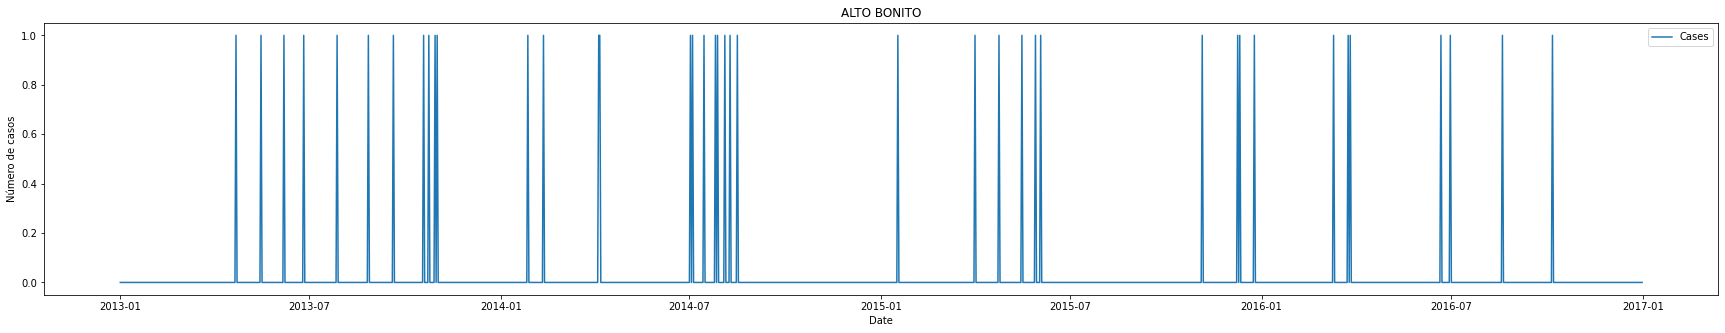

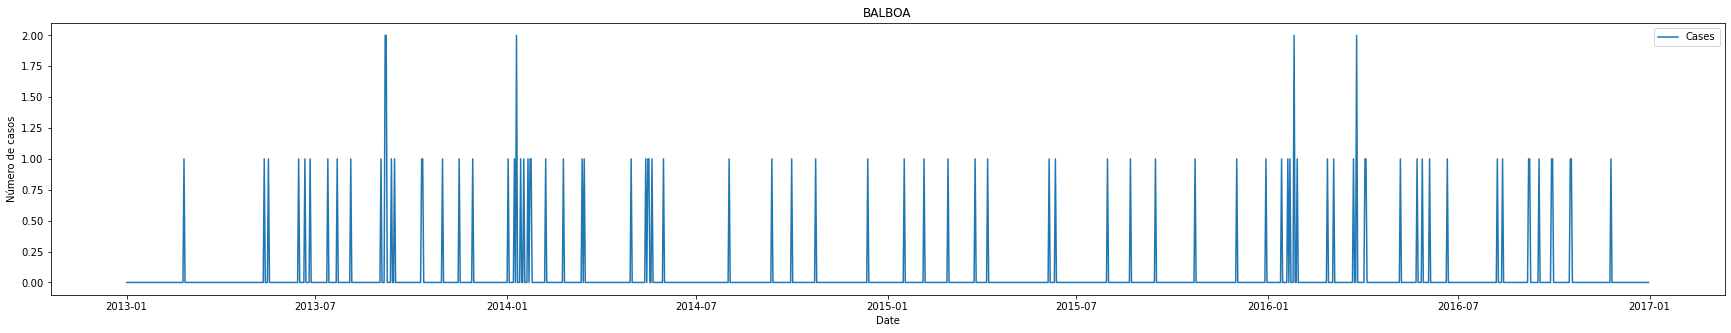

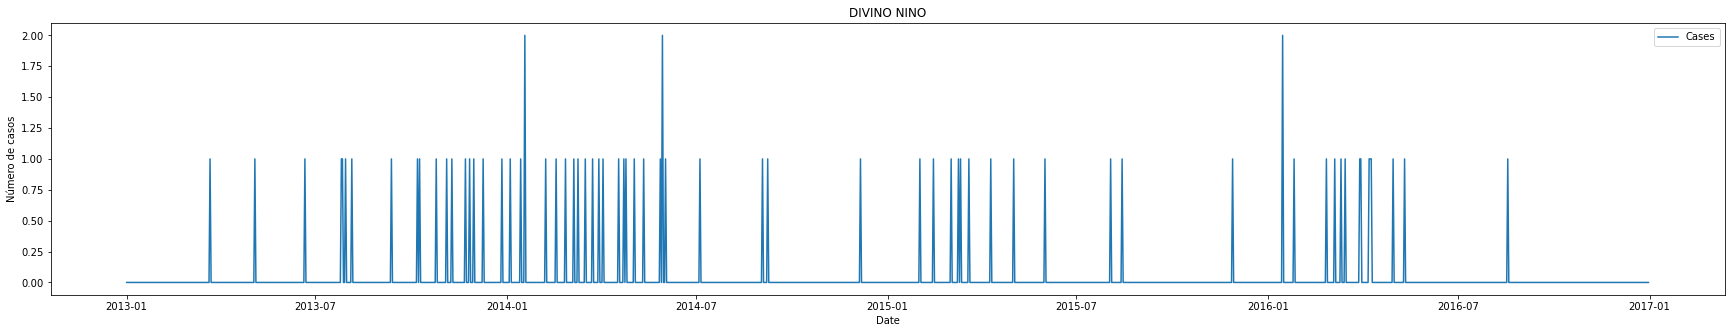

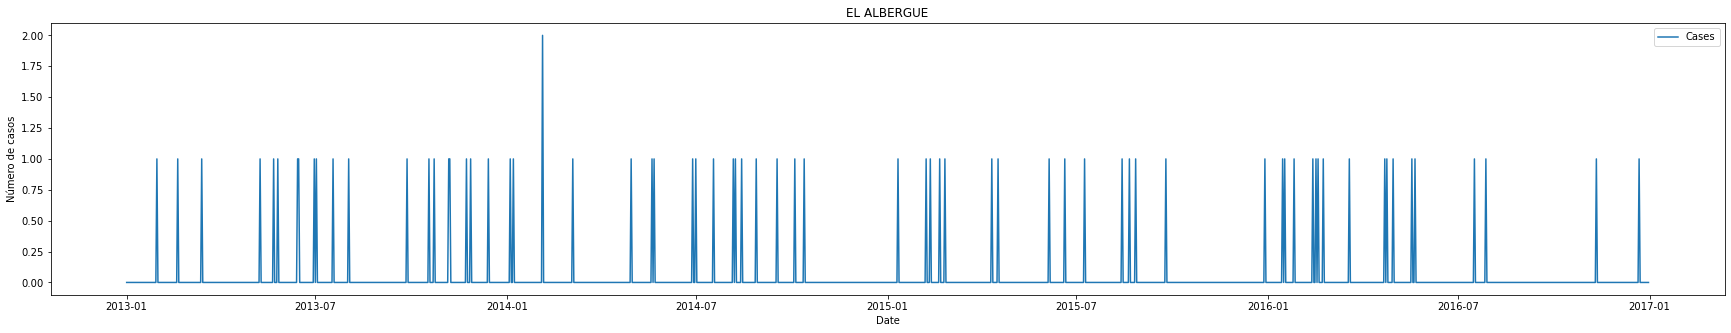

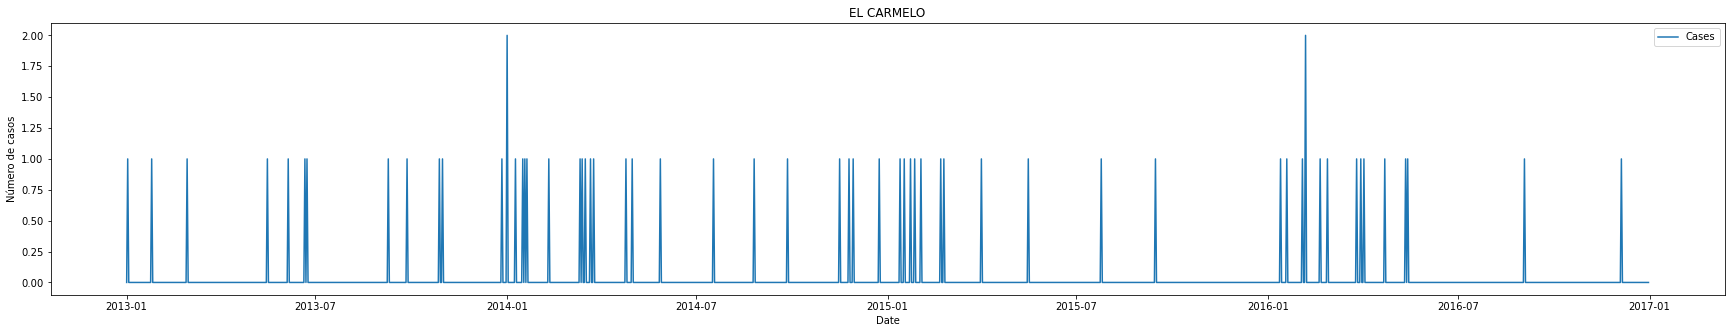

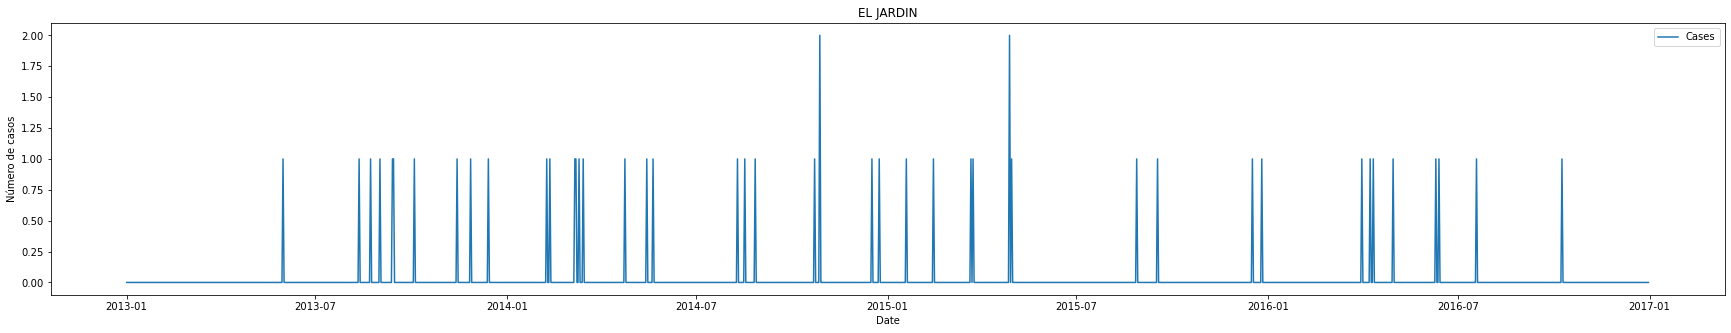

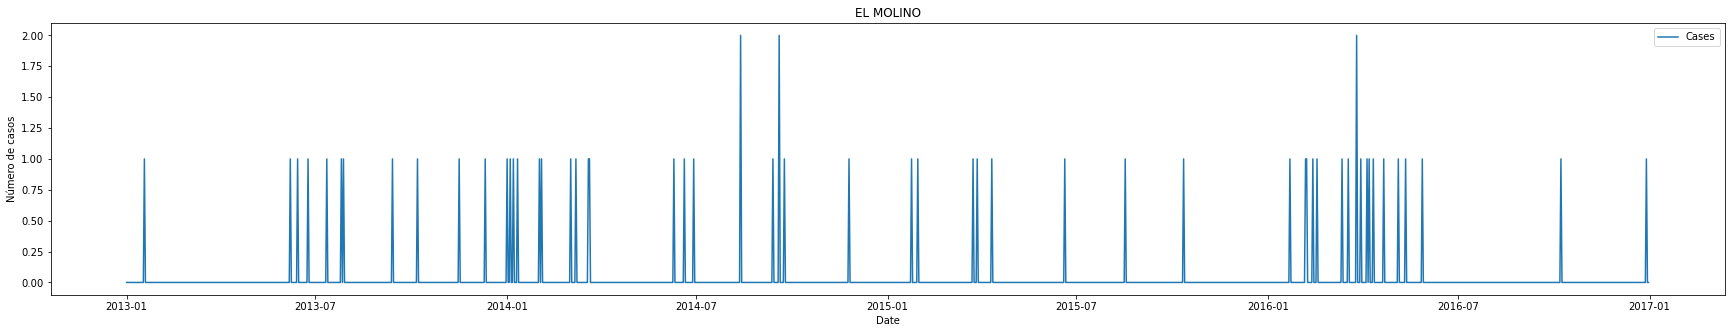

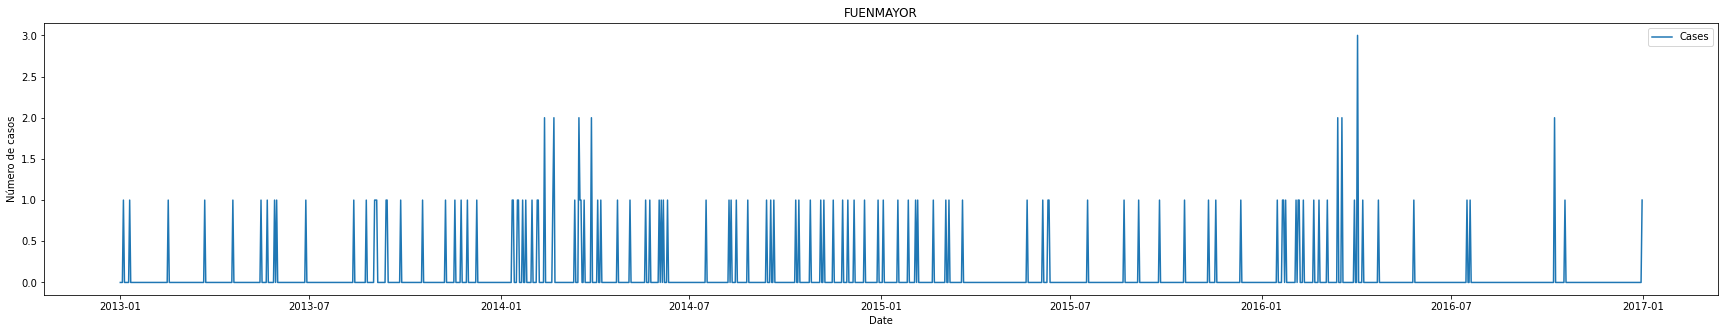

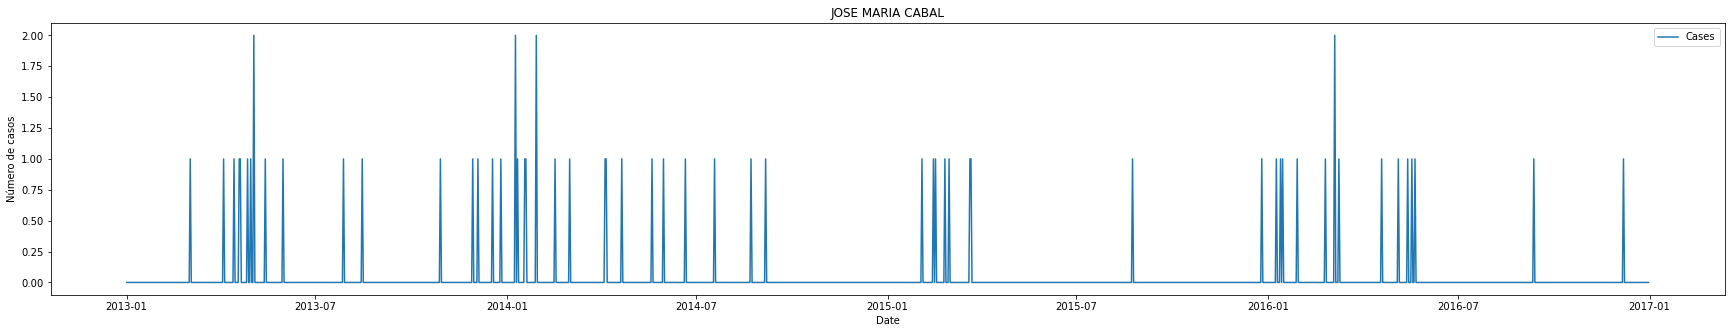

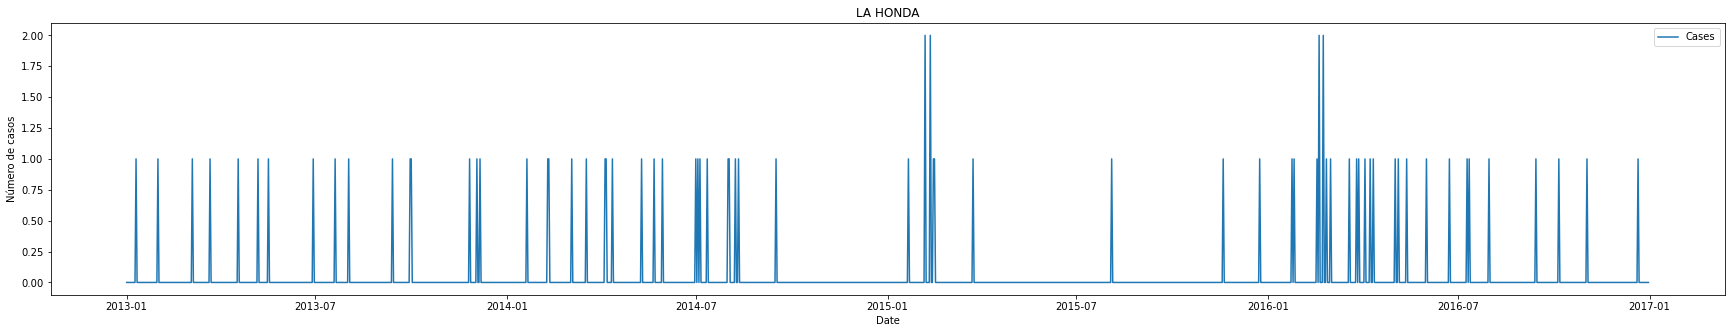

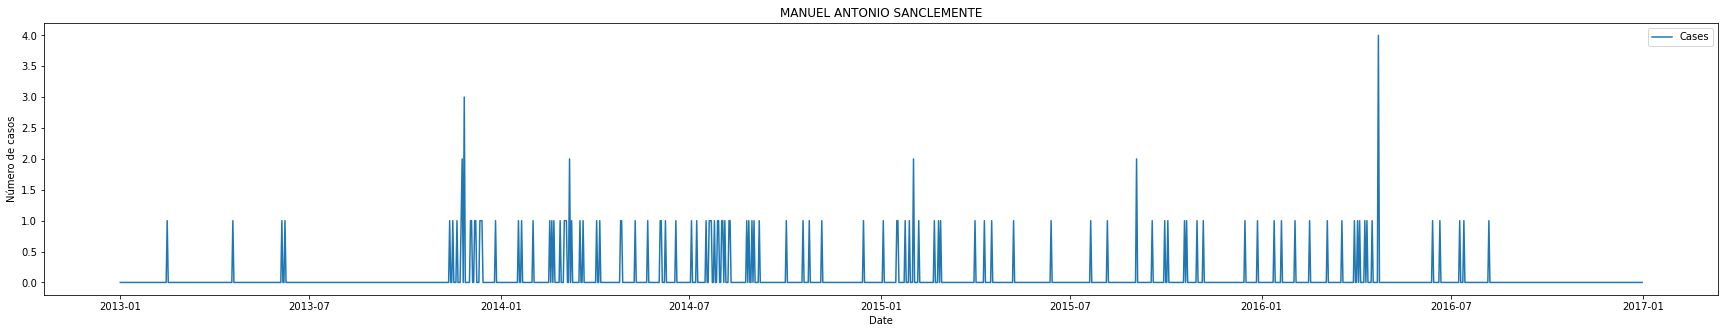

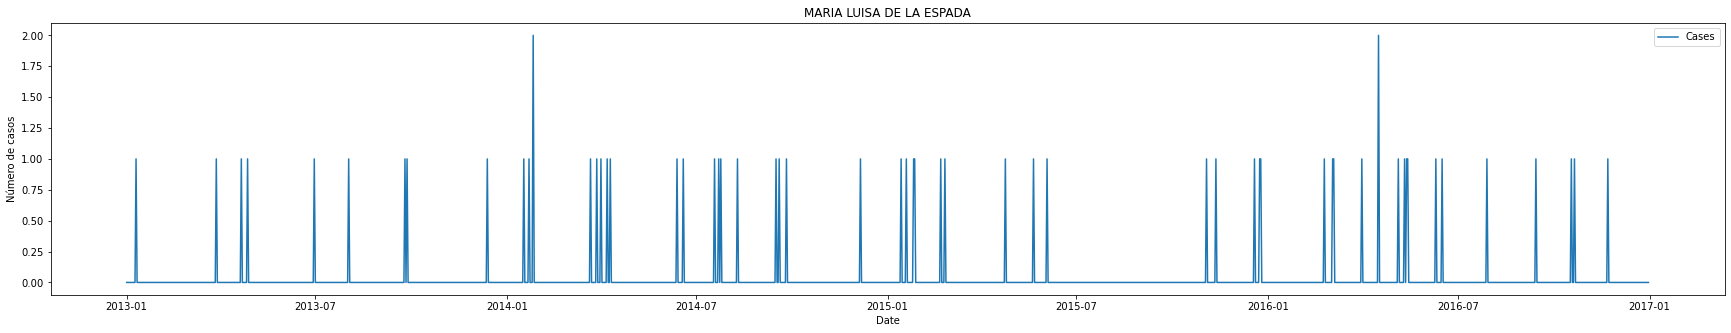

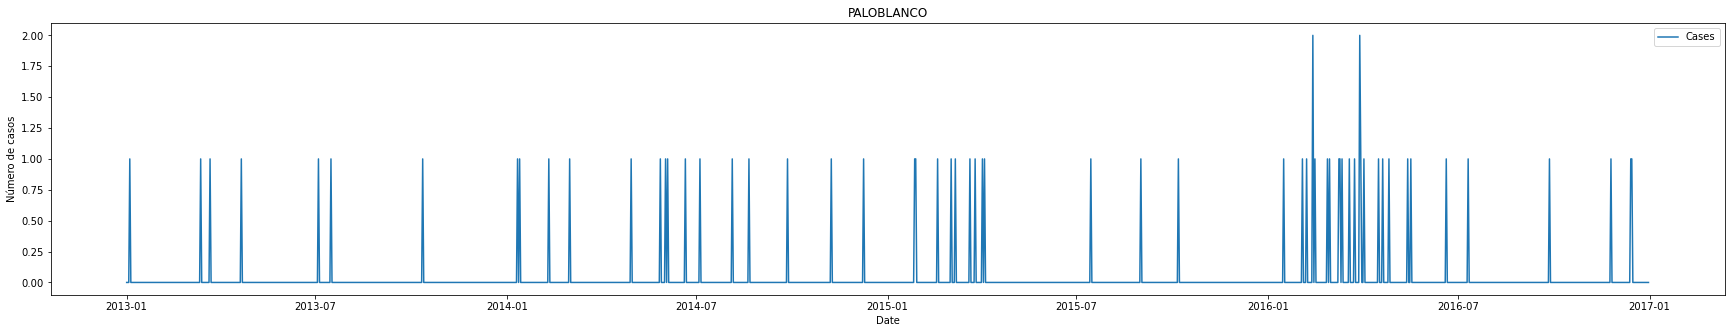

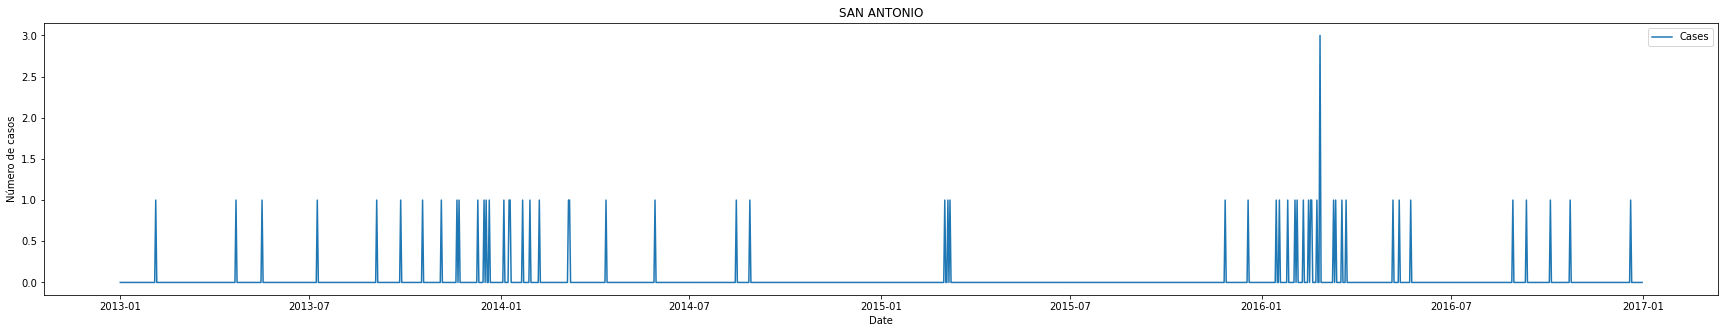

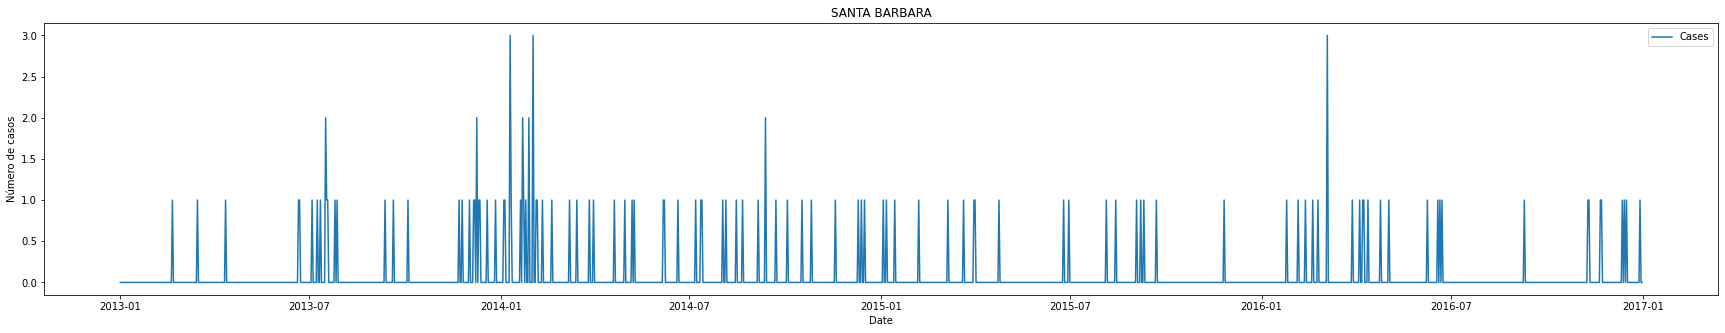

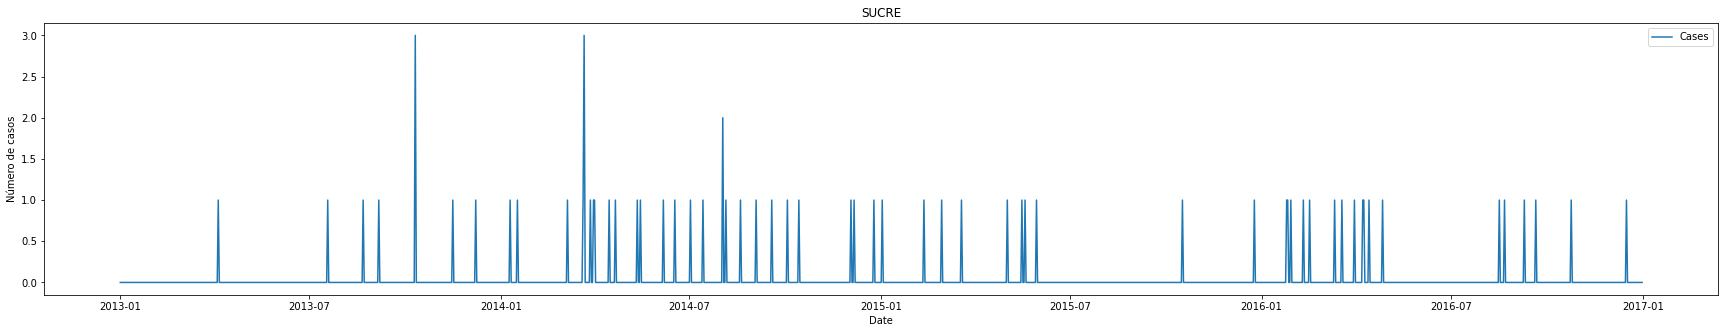

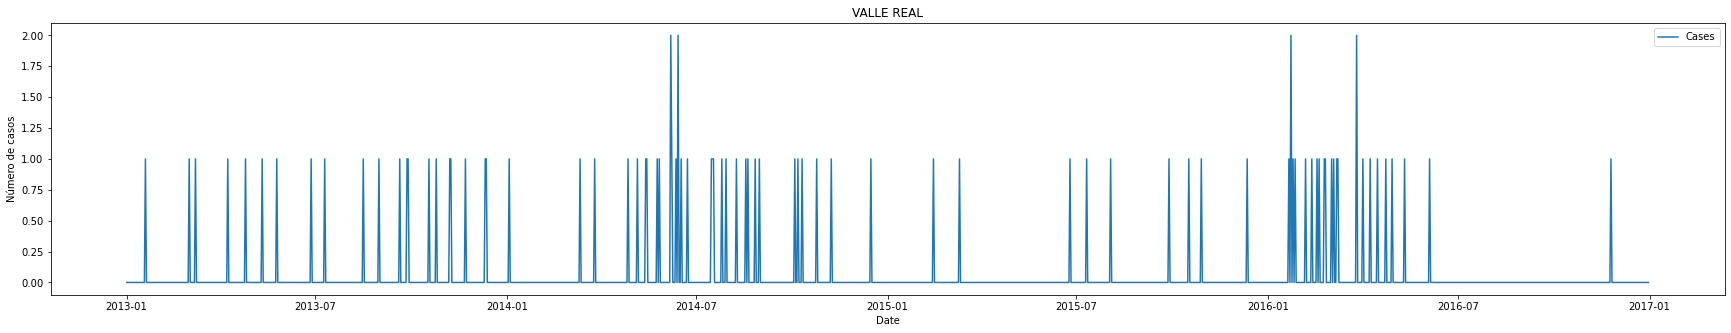

In [7]:
neighborhoods_df = dfBuga['Neighborhood'].value_counts().sort_index()
run_test(neighborhoods_df, 'Buga')

**TODAS LAS SERIES DE TIEMPO PARA CADA UNO DE LOS BARRIOS SON ESTACIONARIAS**

### GIRON

In [8]:
dfGiron = df[df.City == 'Girón']

Estadístico ADF: -4.800466
p-value: 0.000054
Valor crítico:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Rechazo Ho: La serie de tiempo es estacionaria
Estadístico ADF: -5.367018
p-value: 0.000004
Valor crítico:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Rechazo Ho: La serie de tiempo es estacionaria
Estadístico ADF: -5.583245
p-value: 0.000001
Valor crítico:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Rechazo Ho: La serie de tiempo es estacionaria
Estadístico ADF: -6.085779
p-value: 0.000000
Valor crítico:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Rechazo Ho: La serie de tiempo es estacionaria
Estadístico ADF: -10.079452
p-value: 0.000000
Valor crítico:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Rechazo Ho: La serie de tiempo es estacionaria
Estadístico ADF: -12.555032
p-value: 0.000000
Valor crítico:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Rechazo Ho: La serie de tiempo es estacionaria
Estadístico ADF: -6.846976
p-value: 0.000000
Valor crítico:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Rechazo Ho: La serie de tiempo es est

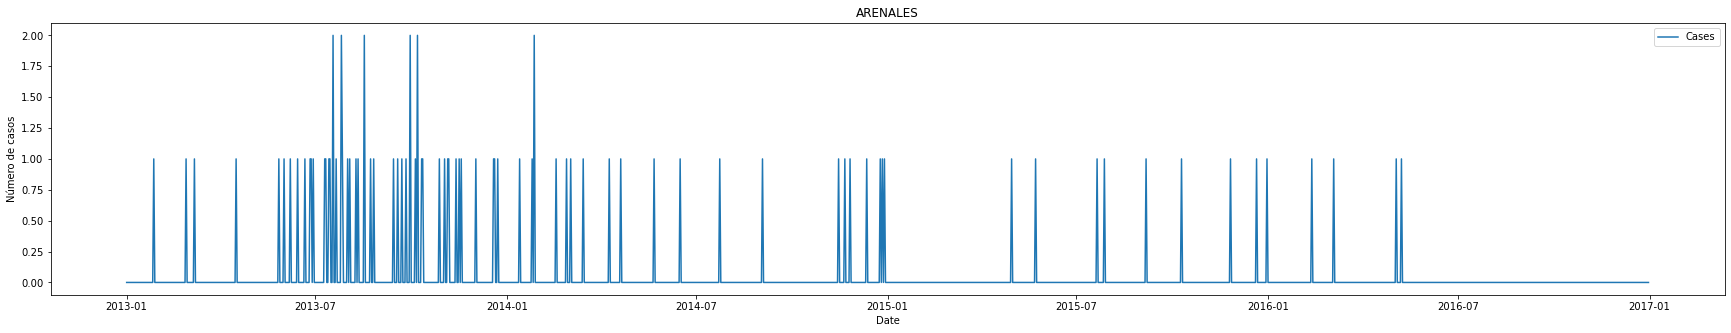

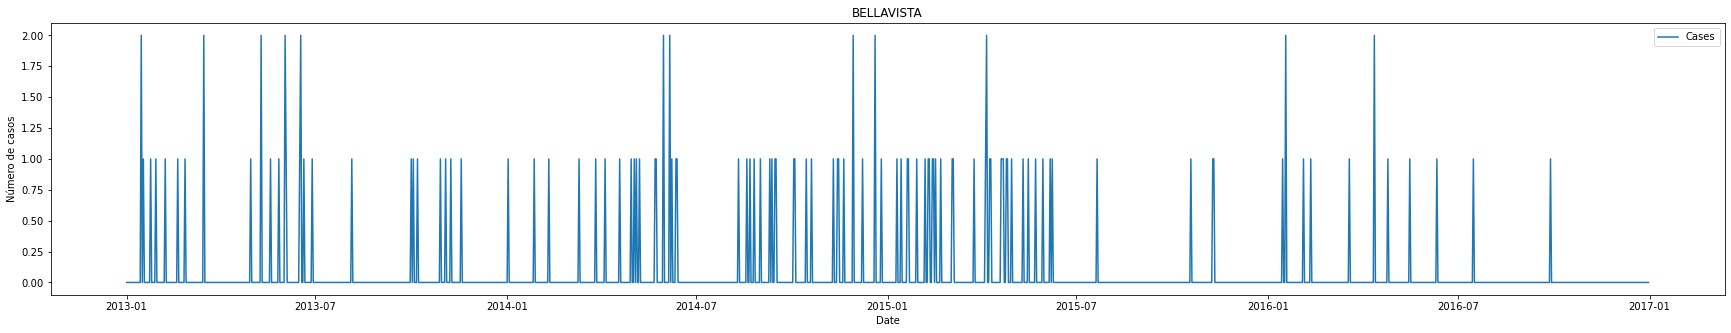

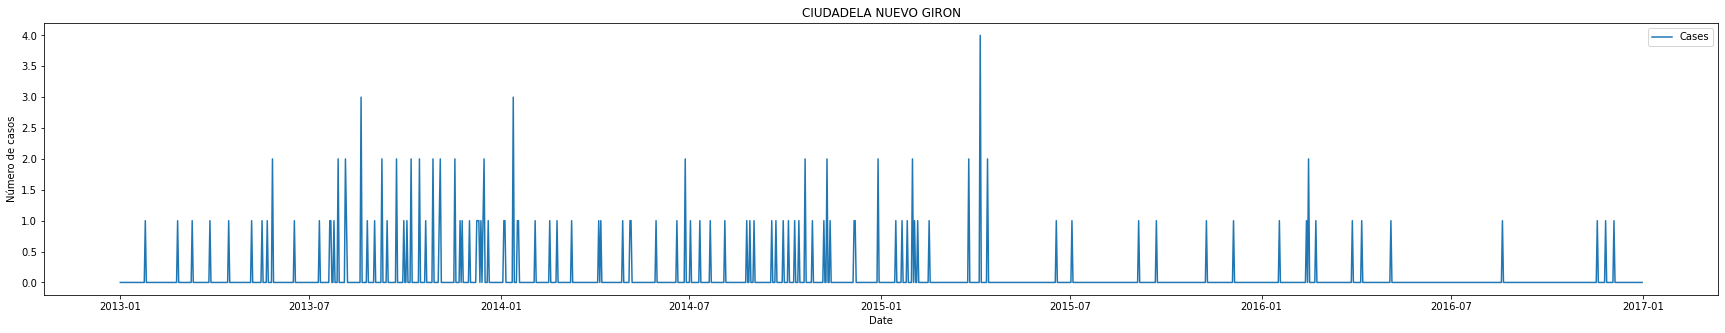

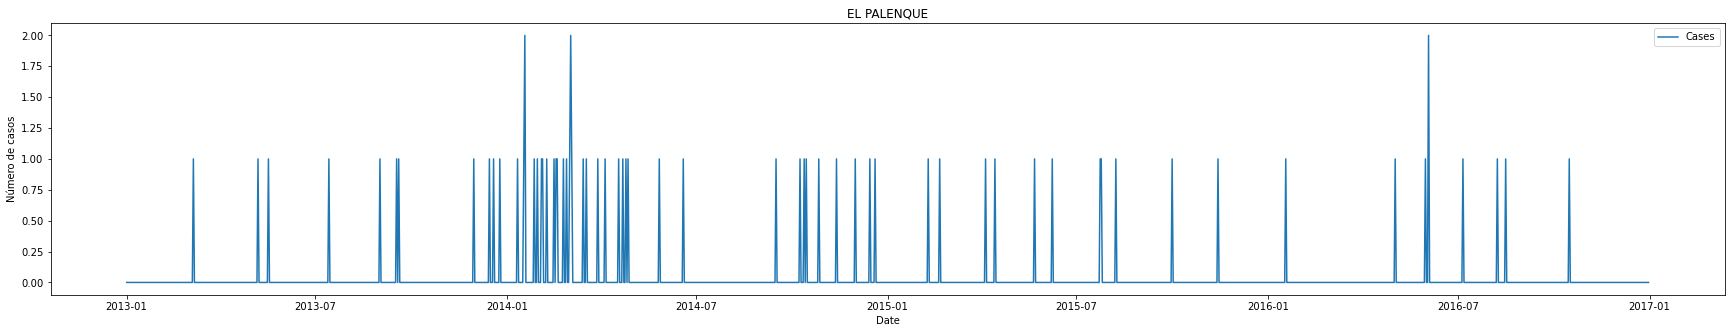

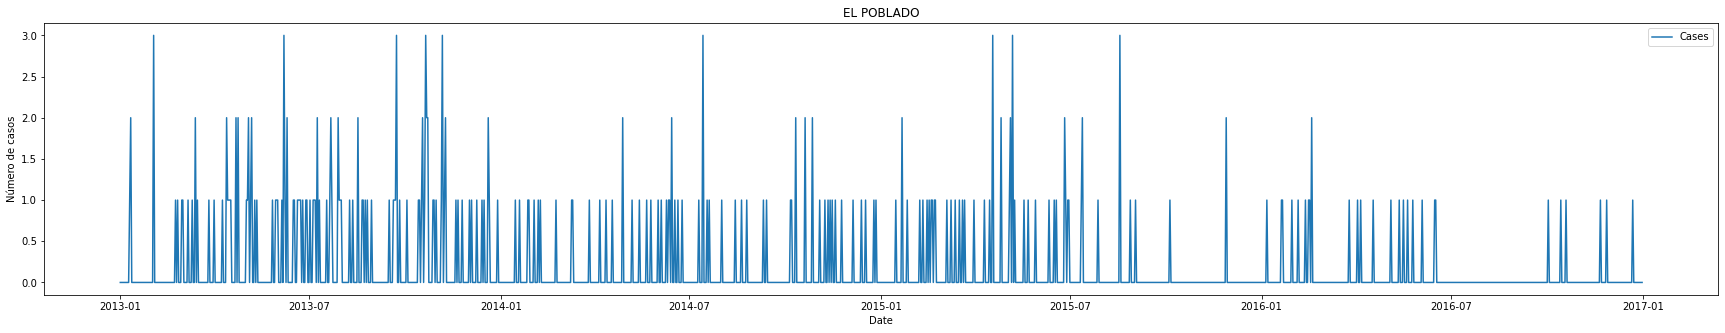

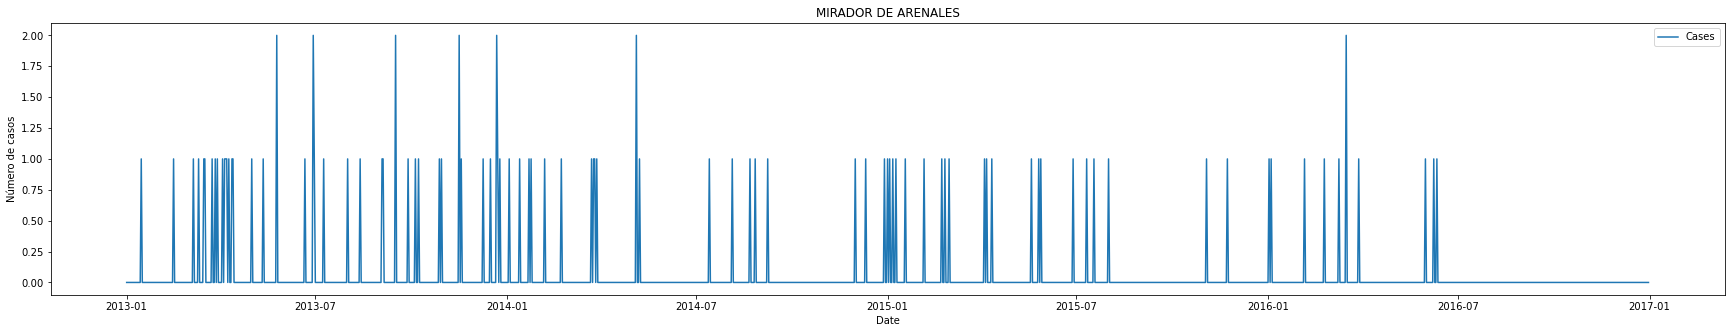

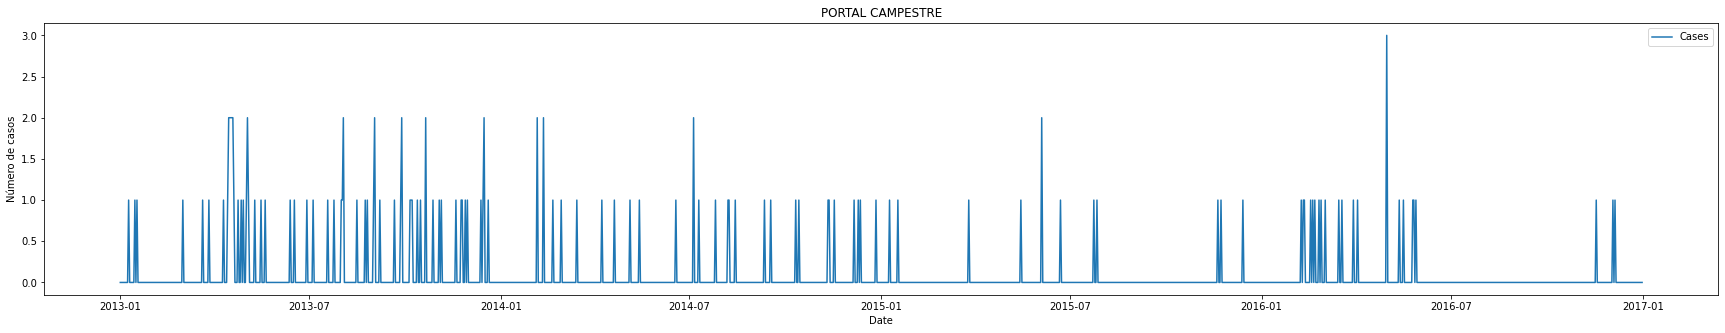

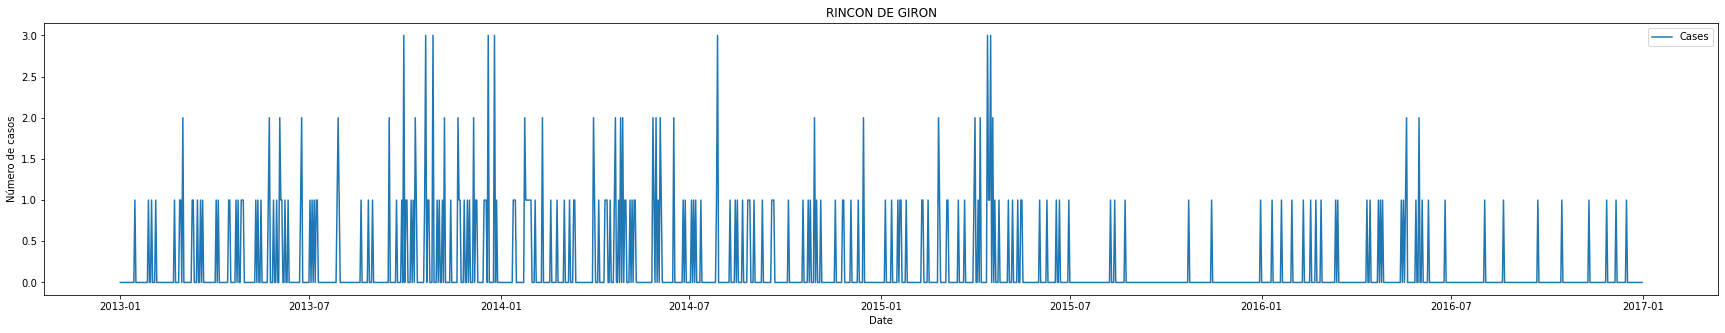

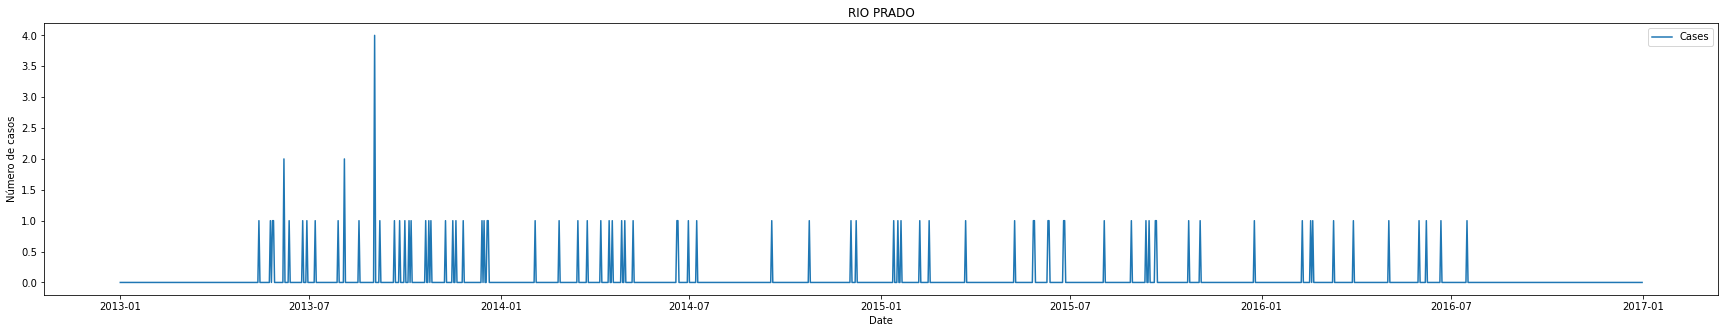

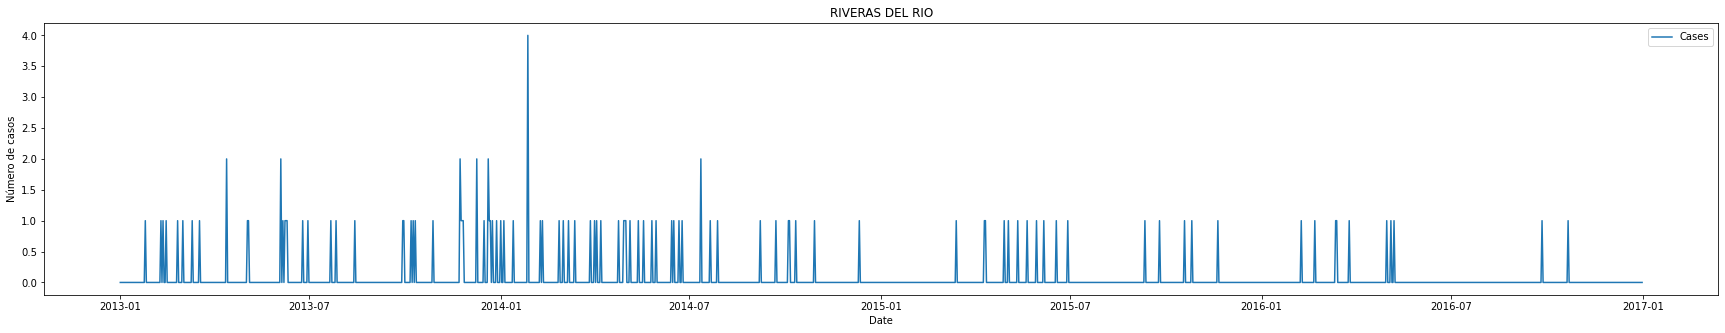

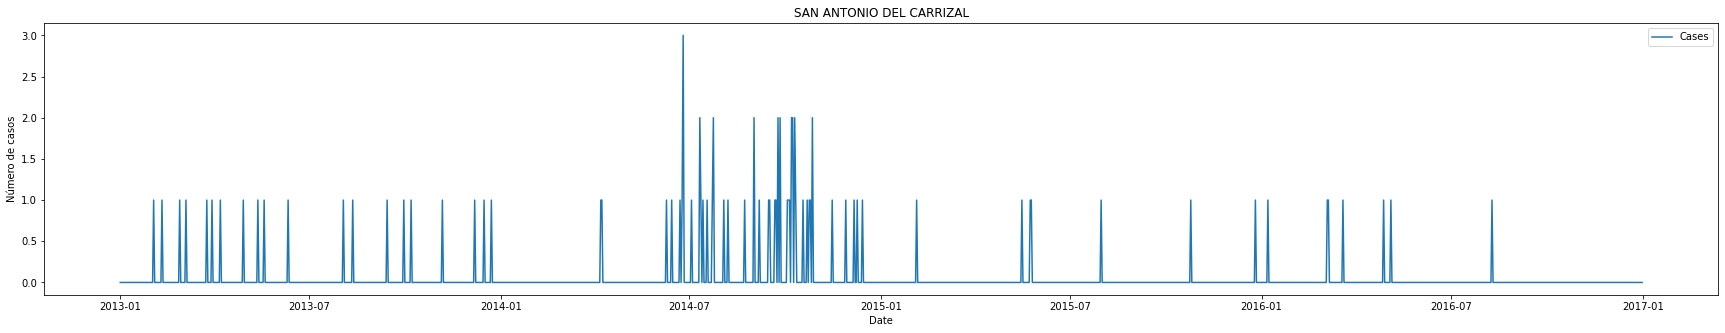

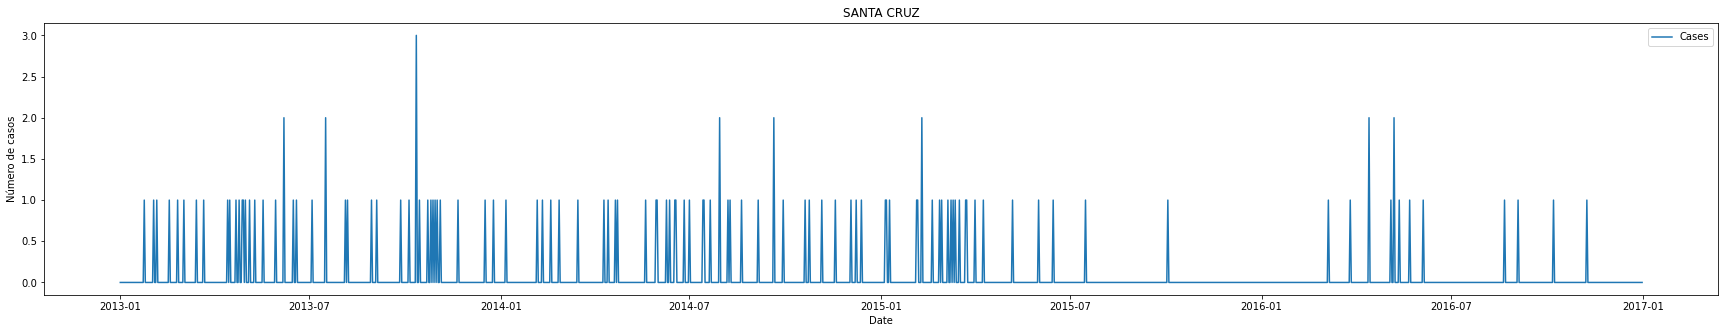

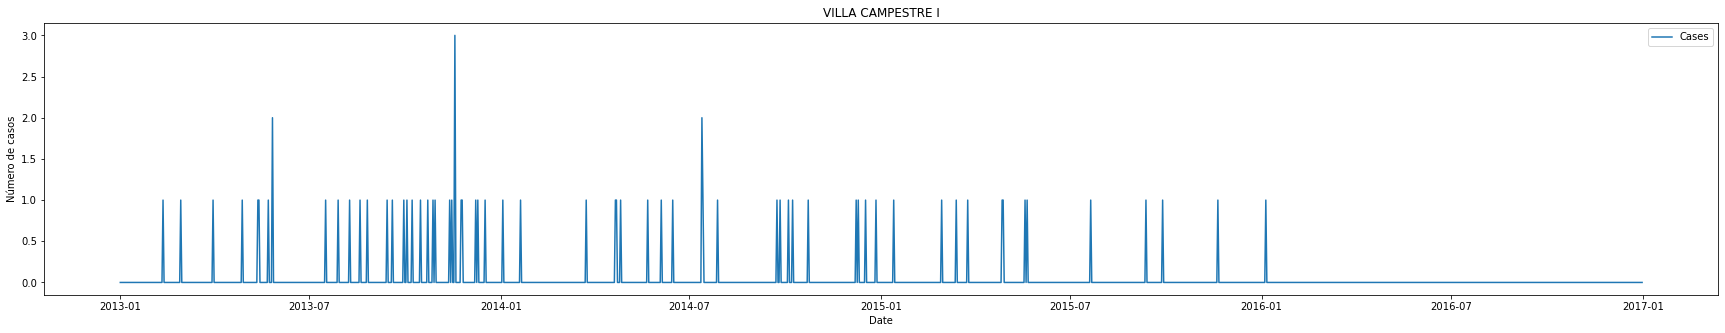

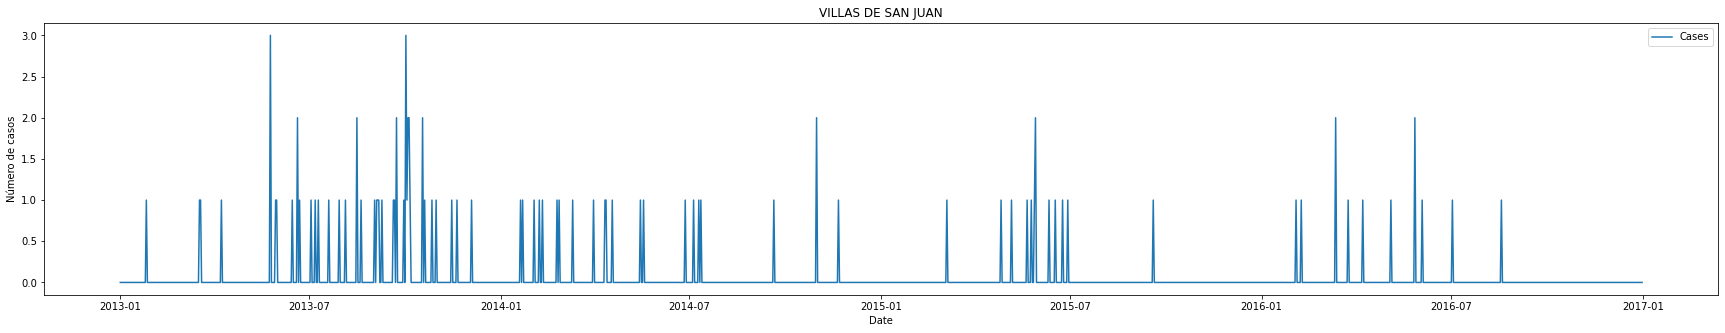

In [9]:
neighborhoods_df = dfGiron['Neighborhood'].value_counts().sort_index()
run_test(neighborhoods_df, 'Giron')

**TODAS LAS SERIES DE TIEMPO PARA CADA UNO DE LOS BARRIOS SON ESTACIONARIAS**

### YOPAL

In [10]:
dfYopal = df[df.City == 'Yopal']

Estadístico ADF: -4.024820
p-value: 0.001286
Valor crítico:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Rechazo Ho: La serie de tiempo es estacionaria
Estadístico ADF: -37.608959
p-value: 0.000000
Valor crítico:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Rechazo Ho: La serie de tiempo es estacionaria
Estadístico ADF: -4.319578
p-value: 0.000411
Valor crítico:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Rechazo Ho: La serie de tiempo es estacionaria
Estadístico ADF: -37.944444
p-value: 0.000000
Valor crítico:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Rechazo Ho: La serie de tiempo es estacionaria
Estadístico ADF: -5.742119
p-value: 0.000001
Valor crítico:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Rechazo Ho: La serie de tiempo es estacionaria
Estadístico ADF: -5.457733
p-value: 0.000003
Valor crítico:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Rechazo Ho: La serie de tiempo es estacionaria
Estadístico ADF: -4.772684
p-value: 0.000061
Valor crítico:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Rechazo Ho: La serie de tiempo es est

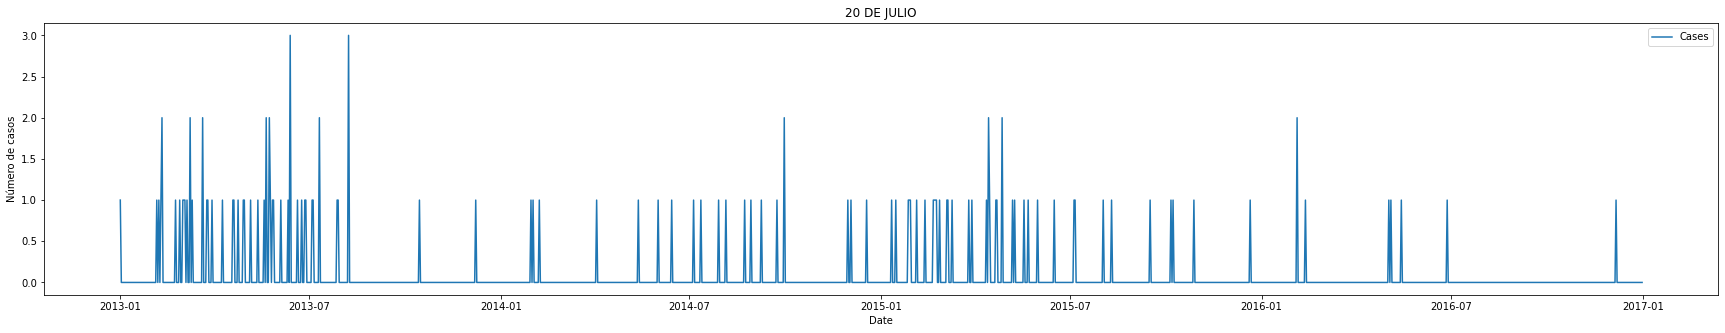

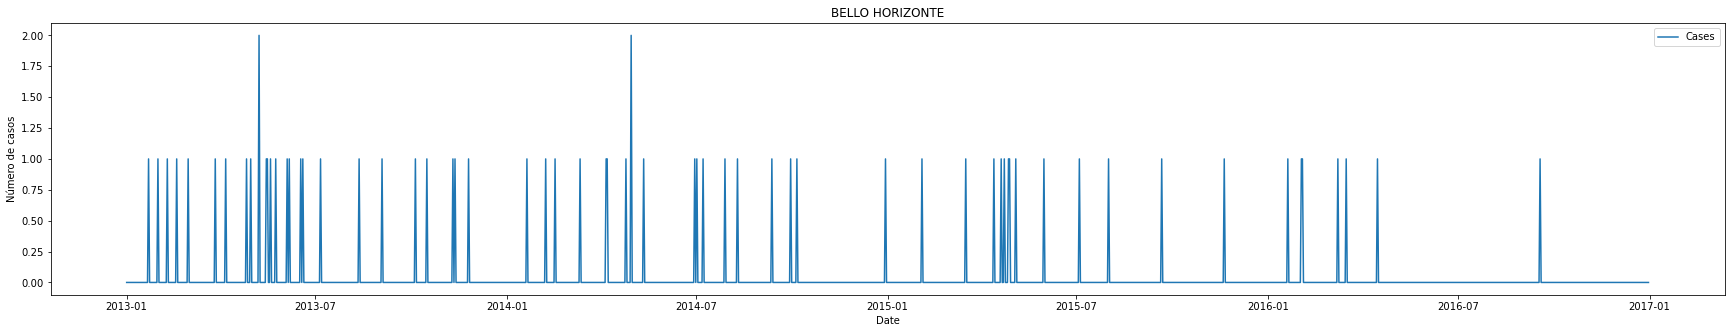

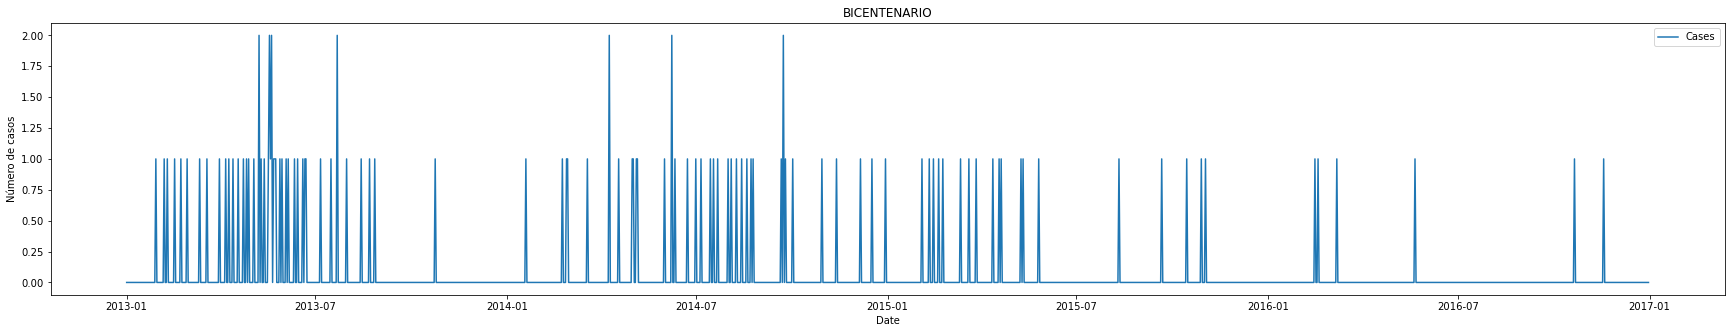

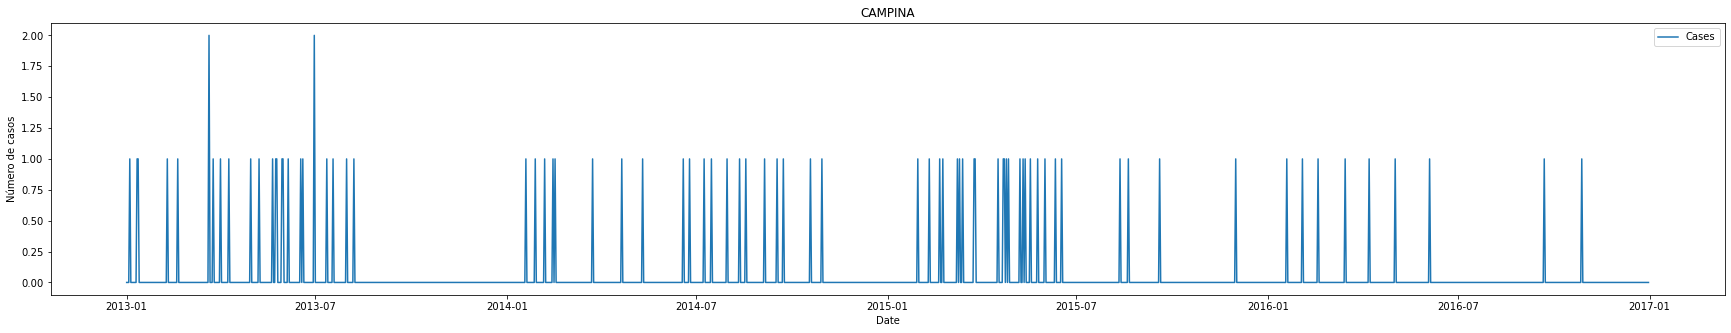

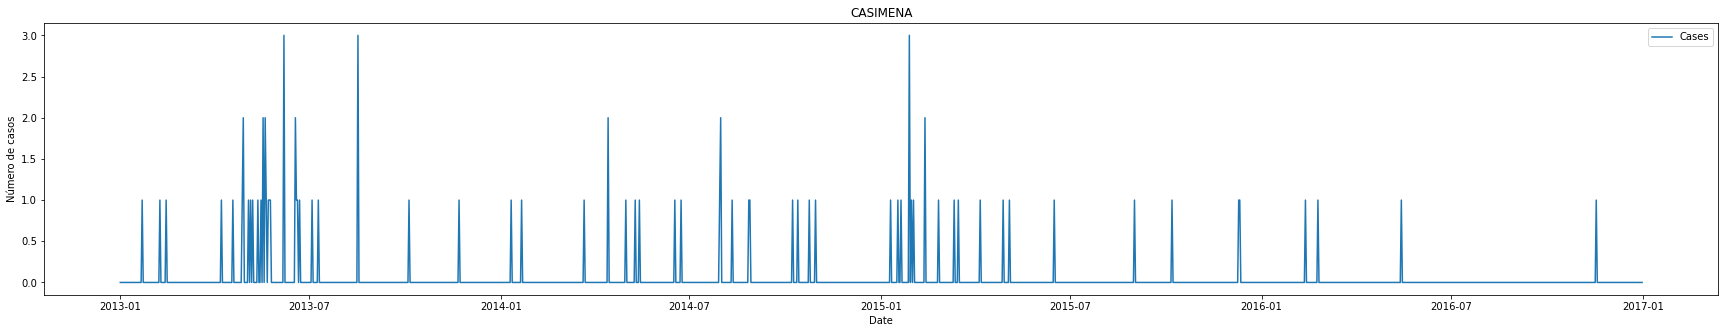

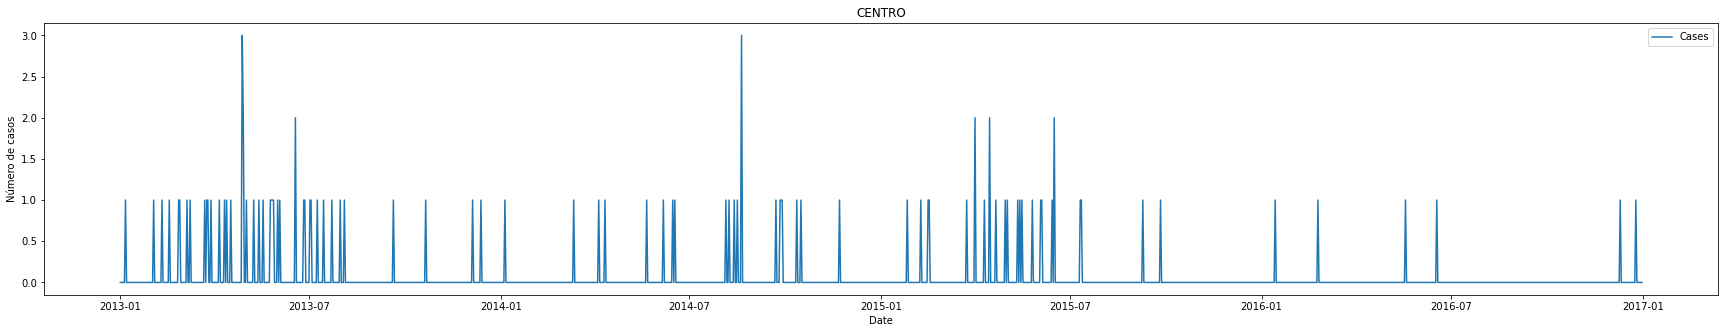

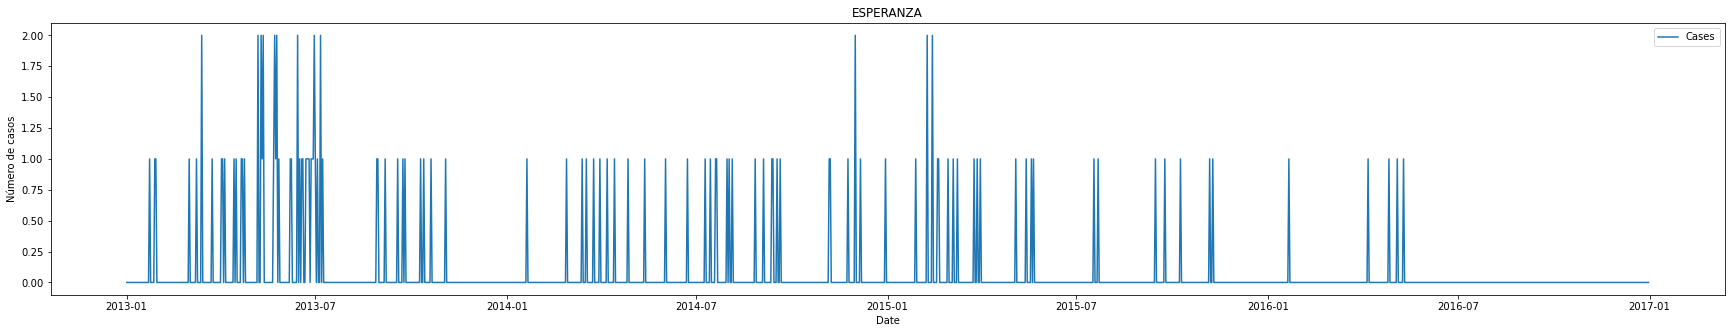

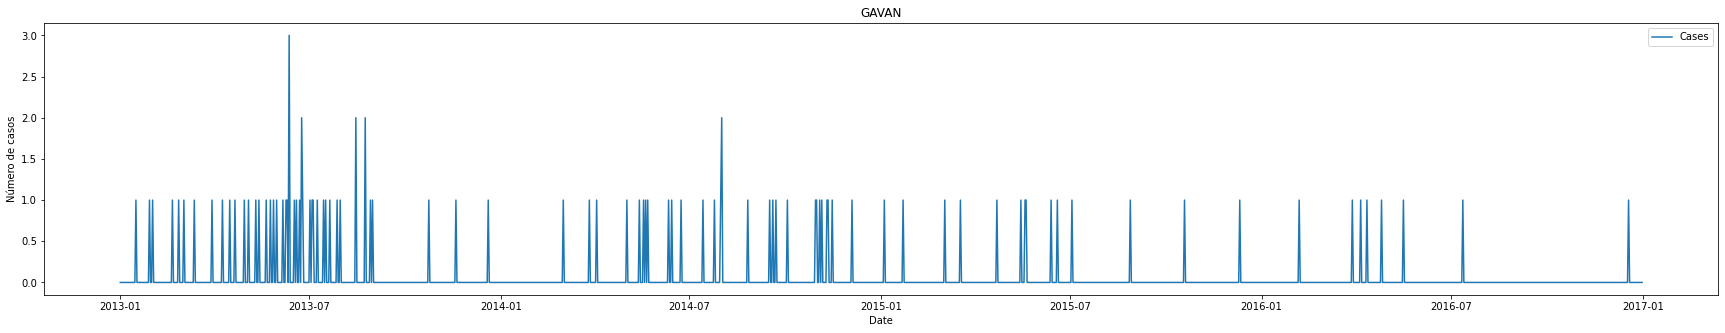

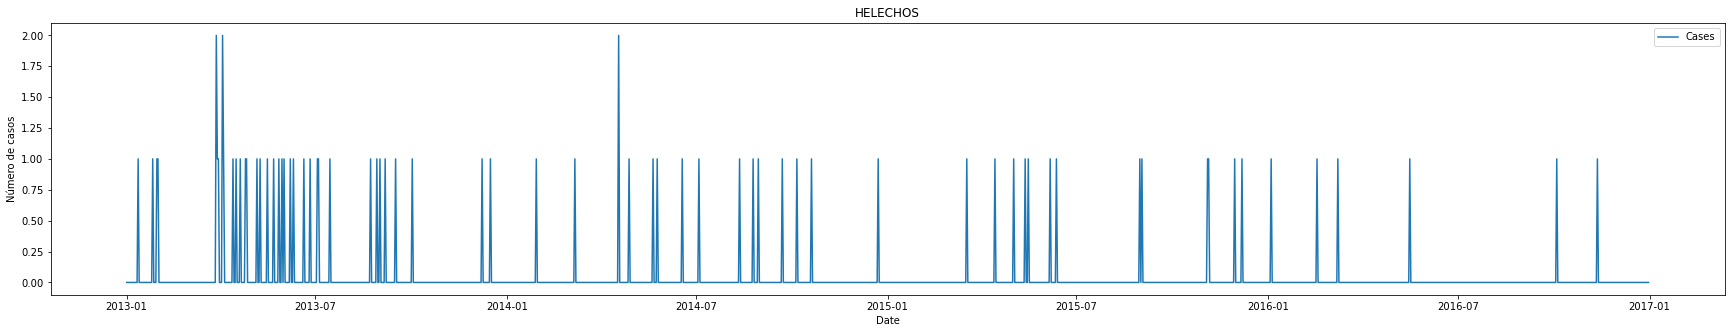

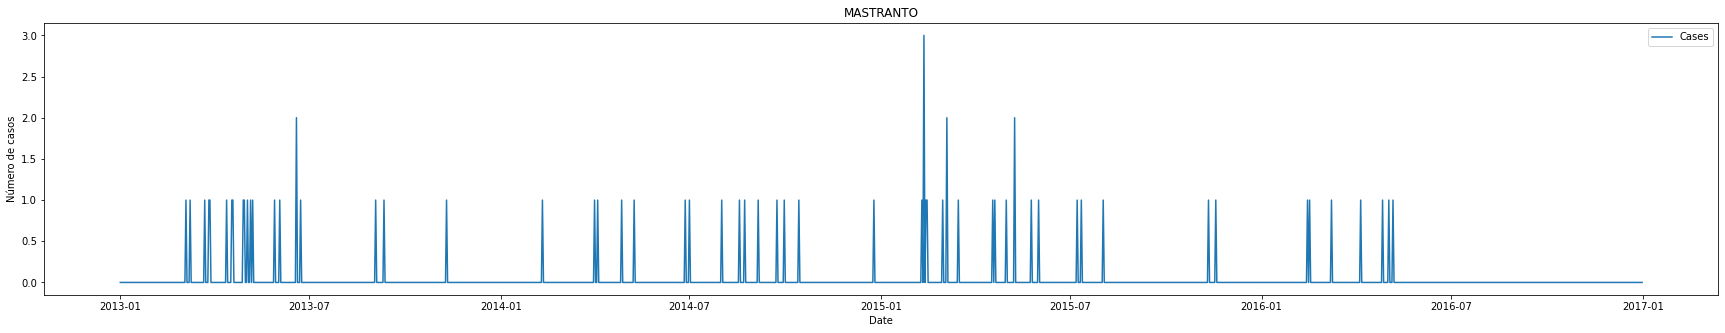

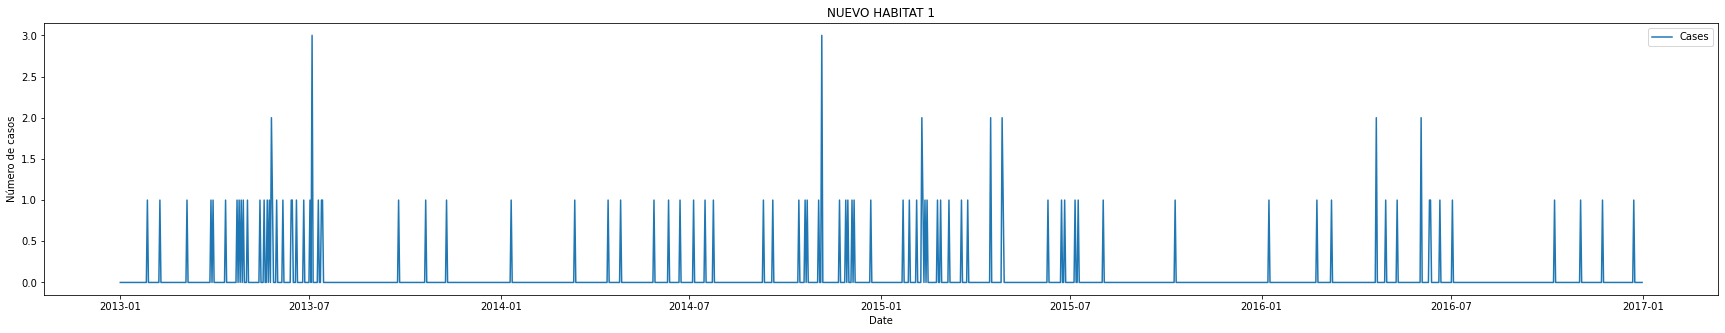

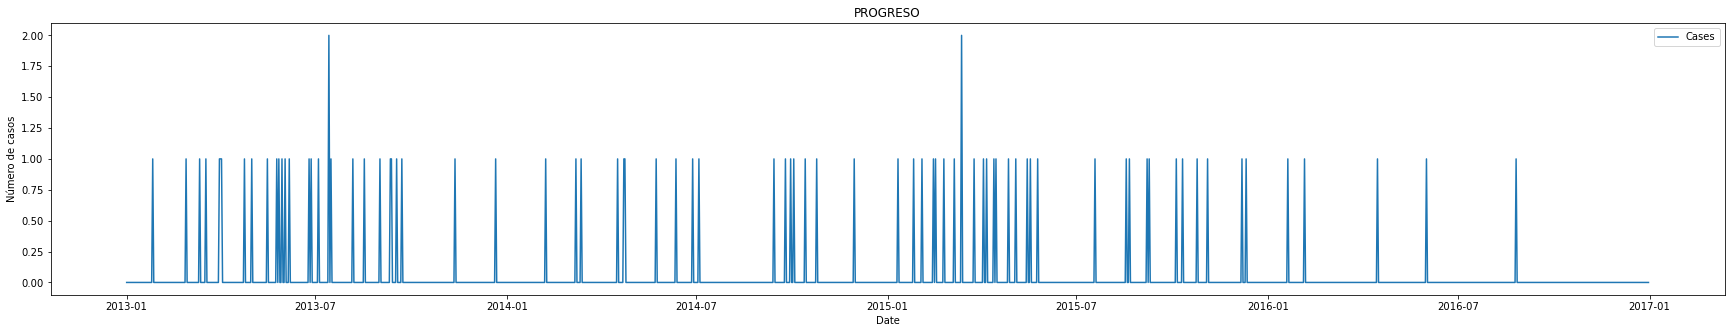

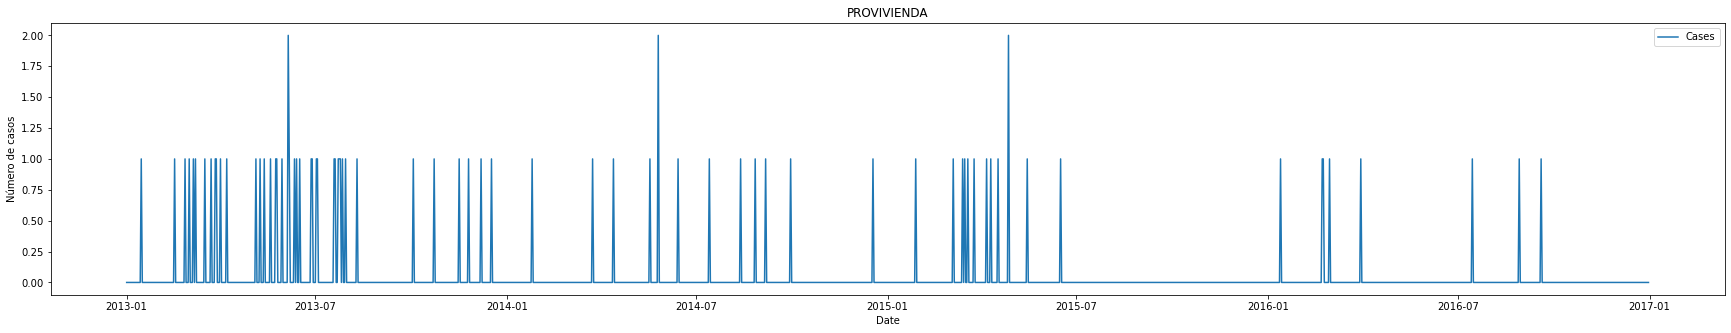

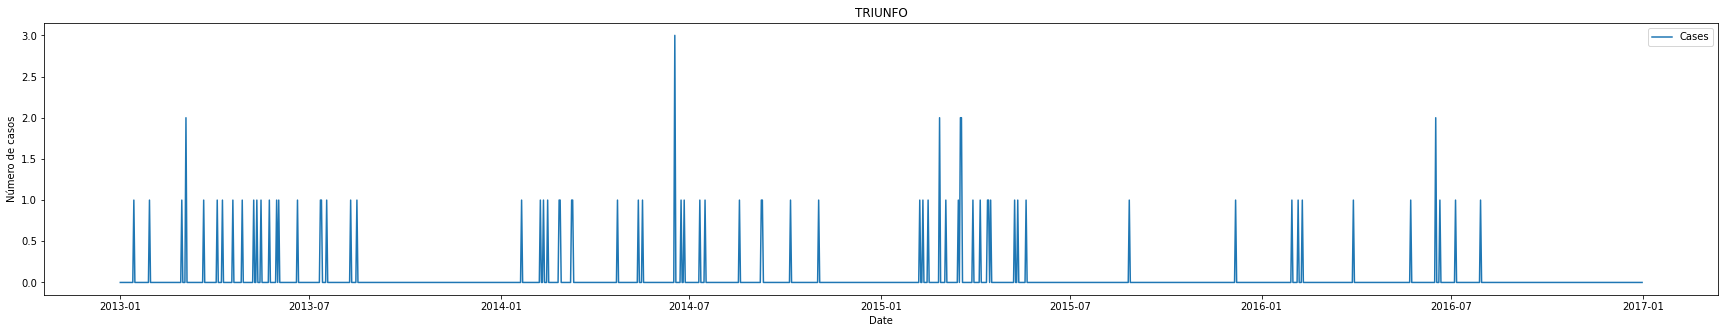

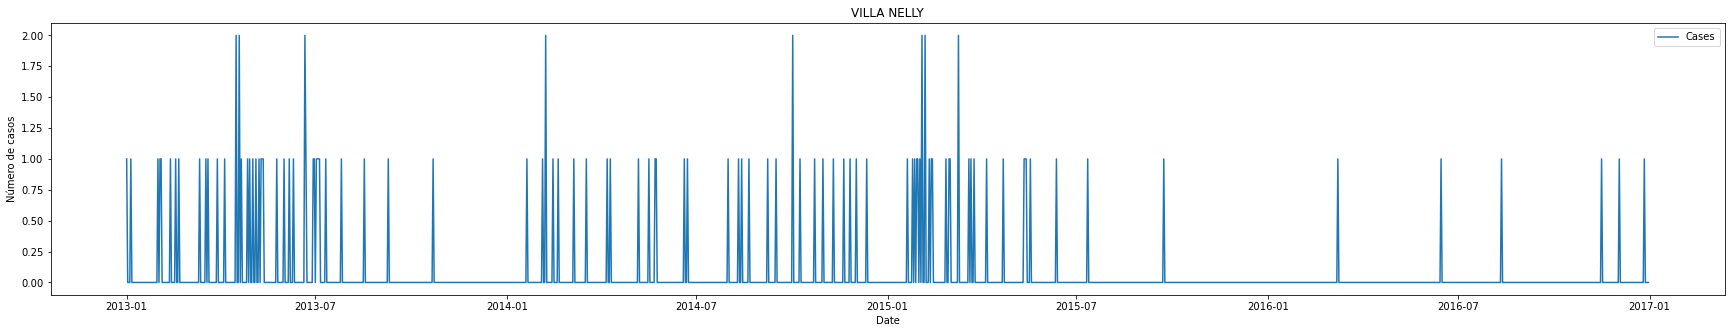

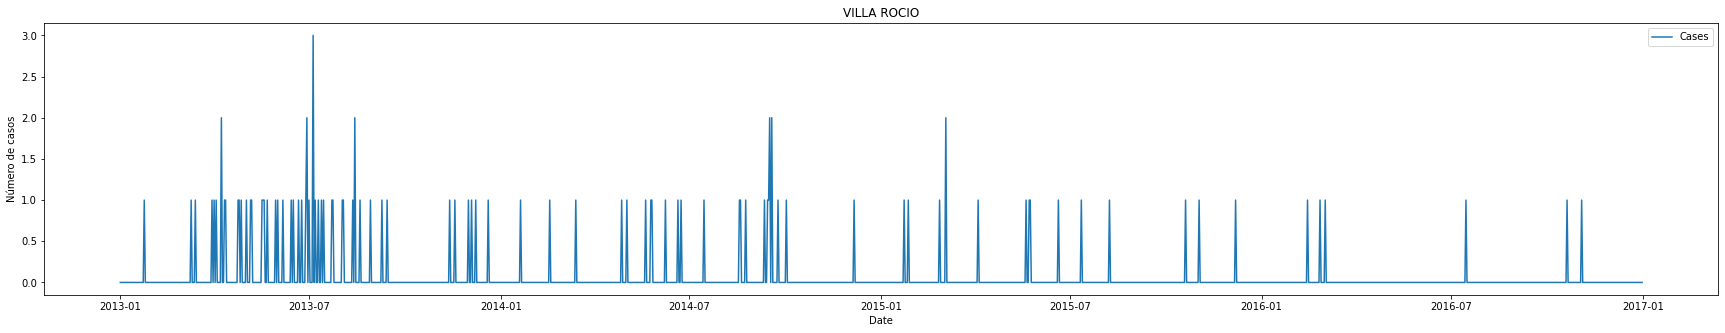

In [11]:
neighborhoods_df = dfYopal['Neighborhood'].value_counts().sort_index()
run_test(neighborhoods_df, 'Yopal')

**TODAS LAS SERIES DE TIEMPO PARA CADA UNO DE LOS BARRIOS SON ESTACIONARIAS**

# ANÁLISIS

- Se escogieron los barrios que tuvieran más 100 o más casos reportados para entrenar el modelo.
- Todos los barrios que se escogieron para cada municipio cumplían con el requisito de estacionariedad, por lo tanto se procede a entrenar el modelo de series de tiempo con ellos.